# Simple models
This example demonstrates how giotto-time can be used for simple prediction pipelines

### Initializing the time series

In [1]:
import sys
sys.path.append('../')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

from gtime.preprocessing import TimeSeriesPreparation
from gtime.compose import FeatureCreation
from gtime.time_series_models import (
    Naive, 
    SeasonalNaive, 
    Average, 
    Drift,
)

In [3]:
def pred_to_plot(y_pred):
    start = y_pred.index.min()
    len_y = len(y_pred.columns)
    window = len_y * pd.Timedelta(y_pred.index.freq)
    end=y_pred.index.max() + window
    ix = pd.period_range(start=start, end=end)
    res = pd.DataFrame(np.nan, index=ix, columns=y_pred.index)
    j = 1
    for i, row in y_pred.iterrows():
        res.loc[i+pd.Timedelta(y_pred.index.freq):i+window, i] = row.values
        j += 1
    return res

In [4]:
df_sp = pd.read_csv('https://storage.googleapis.com/l2f-open-models/giotto-time/examples/data/^GSPC.csv')
df_sp.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-03-18,2072.840088,2106.850098,2061.229980,2099.500000,2099.500000,4128210000
1,2015-03-19,2098.689941,2098.689941,2085.560059,2089.270020,2089.270020,3305220000
2,2015-03-20,2090.320068,2113.919922,2090.320068,2108.100098,2108.100098,5554120000
3,2015-03-23,2107.989990,2114.860107,2104.419922,2104.419922,2104.419922,3267960000
4,2015-03-24,2103.939941,2107.629883,2091.500000,2091.500000,2091.500000,3189820000


In [5]:
df_close = df_sp.set_index('Date')['Close']

In [6]:
df_close.index = pd.to_datetime(df_close.index)

### Time Series Preparation
The input time series has to be a `DataFrame` with a `PeriodIndex`. Use the provided class `TimeSeriesPreparation` to convert the time series into this format.

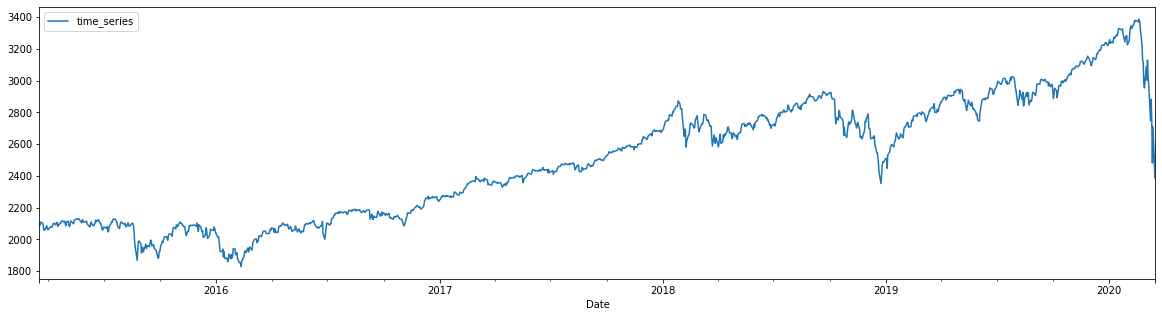

In [7]:
time_series_preparation = TimeSeriesPreparation()
period_index_time_series = time_series_preparation.transform(df_close)
period_index_time_series.plot(figsize=(20, 5))
plt.show()

### Naïve model

In [8]:
model = Naive(horizon=60)
model.fit(period_index_time_series)

Naive(horizon=60)

In [9]:
y_pred = model.predict()
y_plot = pred_to_plot(y_pred)
for i in y_plot.columns:
    y_plot.loc[i, i] = period_index_time_series.loc[i].values

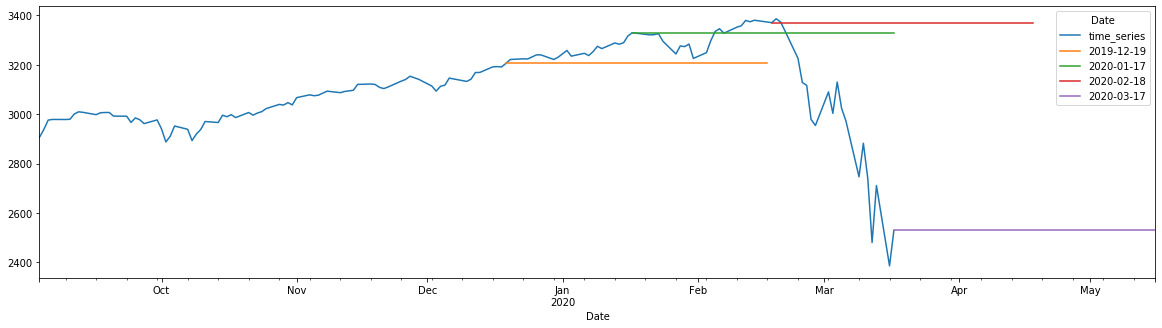

In [10]:
ax = period_index_time_series.loc['2019-09-01':].plot(figsize=(20, 5))
y_plot.iloc[:, [0, 19, 39, 59]].plot(ax=ax)
plt.show()

### Seasonal naïve model

In [11]:
model = SeasonalNaive(horizon=60, seasonal_length=30)
model.fit(period_index_time_series)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


SeasonalNaive(horizon=60, seasonal_length=None)

In [12]:
y_pred = model.predict()
y_plot = pred_to_plot(y_pred)
for i in y_plot.columns:
    y_plot.loc[i, i] = period_index_time_series.loc[i].values

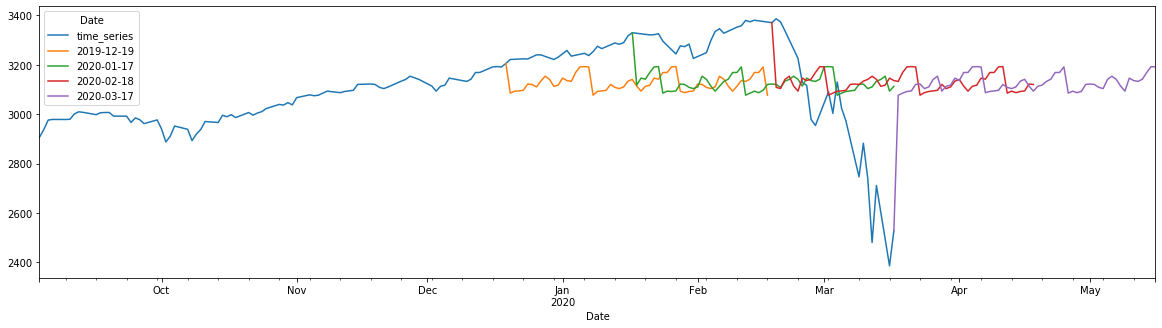

In [13]:
ax = period_index_time_series.loc['2019-09-01':].plot(figsize=(20, 5))
y_plot.iloc[:, [0, 19, 39, 59]].plot(ax=ax)
plt.show()

### Average model

In [14]:
model = Average(horizon=60)
model.fit(period_index_time_series)

Average(horizon=60)

In [15]:
y_pred = model.predict()
y_plot = pred_to_plot(y_pred)
for i in y_plot.columns:
    y_plot.loc[i, i] = period_index_time_series.loc[i].values

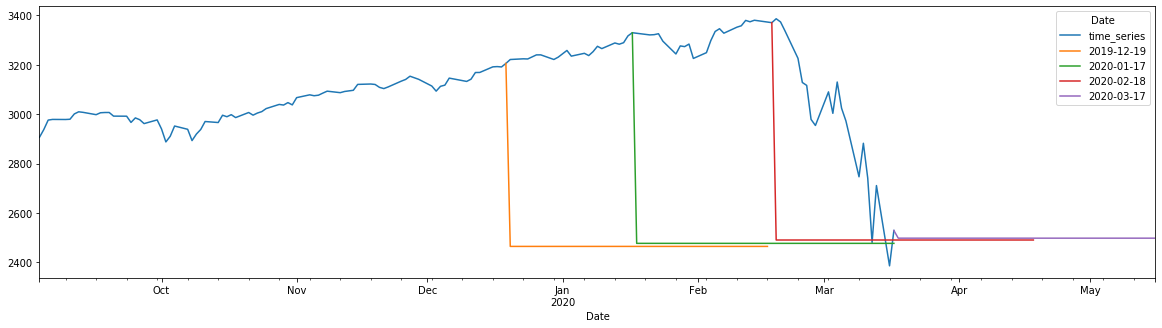

In [16]:
ax = period_index_time_series.loc['2019-09-01':].plot(figsize=(20, 5))
y_plot.iloc[:, [0, 19, 39, 59]].plot(ax=ax)
plt.show()

### Drift model

In [17]:
model = Drift(horizon=60)
model.fit(period_index_time_series)

Drift(horizon=60)

In [18]:
y_pred = model.predict()
y_plot = pred_to_plot(y_pred)
for i in y_plot.columns:
    y_plot.loc[i, i] = period_index_time_series.loc[i].values

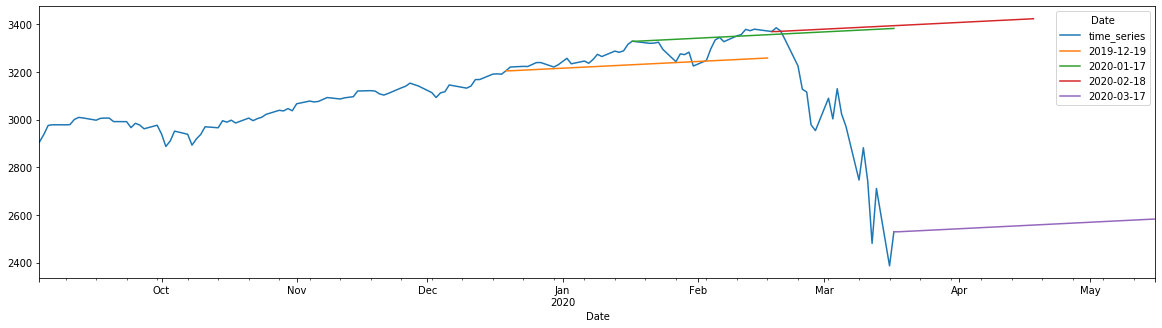

In [19]:
ax = period_index_time_series.loc['2019-09-01':].plot(figsize=(20, 5))
y_plot.iloc[:, [0, 19, 39, 59]].plot(ax=ax)
plt.show()